 **This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. You might be thinking of another unicorn in town as to OYO Hotels which has kind of a relatable business model but Airbnb allows you to be host for anyone anywhere with rooms/beds available in your personal space. OYO Rooms and Airbnb are by no means similar to each other, in fact, they are almost as opposite as the sky and sea. So, having much said let’s just deep dive into our actuals on why are we basically here? Scroll below and have a feel!**



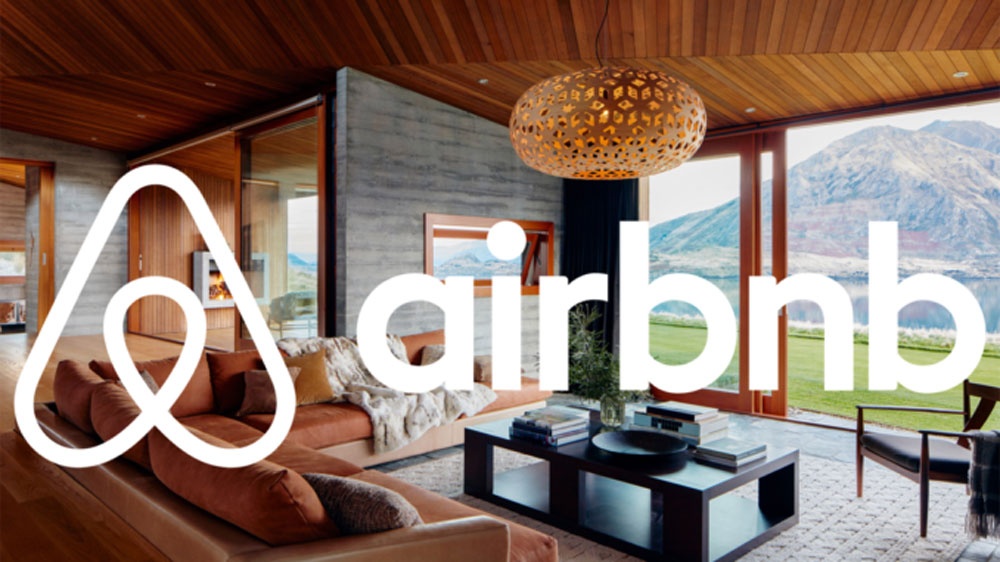


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :


What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Airbnb NYC 2019.csv')
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35439,28123818,KING Room w Private Entrance - Times Square,42998647,Prav,Manhattan,Hell's Kitchen,40.75759,-73.99006,Private room,45,3,72,2019-06-23,6.99,3,86
10800,8313551,Recently renovated private floor,5268758,Jennifer,Queens,Sunnyside,40.73633,-73.92641,Entire home/apt,125,1,172,2019-07-06,4.48,1,234
31276,24287062,Sally's hideaway,180289633,Aleksej,Queens,Woodside,40.74660,-73.89176,Entire home/apt,150,4,27,2019-06-23,2.00,1,321
1444,647413,Charming 1 bedroom Apt in Brooklyn,3245898,Ede,Brooklyn,Prospect Heights,40.67950,-73.96850,Entire home/apt,150,3,18,2019-04-06,0.26,1,68
39010,30476363,"COZY APARTMENT, CLOSE TO MIDTOWN-MANHATTAN.",3229770,Luis,Queens,Sunnyside,40.73662,-73.92372,Entire home/apt,129,3,7,2019-07-01,1.11,4,280
48671,36379292,Little Italy Studio in Soho - Sleeps up to 4!,273544738,Jane,Manhattan,Nolita,40.72132,-73.99586,Entire home/apt,176,2,0,NaN,NaN,1,324
42578,33047256,Cozy Boutique Studio | Heart of NYC,11391775,Aidin,Manhattan,Kips Bay,40.74284,-73.97967,Entire home/apt,150,1,22,2019-06-26,7.02,1,29
45639,34868954,3 Bedroom Williamsburg Duplex 15 min to Manhat...,262883761,Bill,Brooklyn,Williamsburg,40.71359,-73.94875,Entire home/apt,203,3,4,2019-07-01,3.53,1,254
39958,31052540,“Quincy Manor” in the heart of Bedford-Stuyves...,82735692,David,Brooklyn,Bedford-Stuyvesant,40.68858,-73.94534,Entire home/apt,100,2,20,2019-07-07,3.16,1,273
46732,35412871,2 Bedroom Apartment East Village Amazing Location,265183076,Molly,Manhattan,East Village,40.72697,-73.98373,Entire home/apt,250,2,4,2019-07-01,4.00,1,183


### check the dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### So what are the numerical and categorical variables?

**By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.**

*So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.*

*While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables*

### Data preprocessing

### Why Do We Need To Care About Handling Missing Value?

**It is important to handle the missing values appropriately.**

**Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
You may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.
Missing data can lead to a lack of precision in the statistical analysis.**

In [4]:
null_values=df.isnull().sum()/len(df)*100

In [5]:
null_values.sort_values(ascending=False)

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### visualize missing data

<AxesSubplot:>

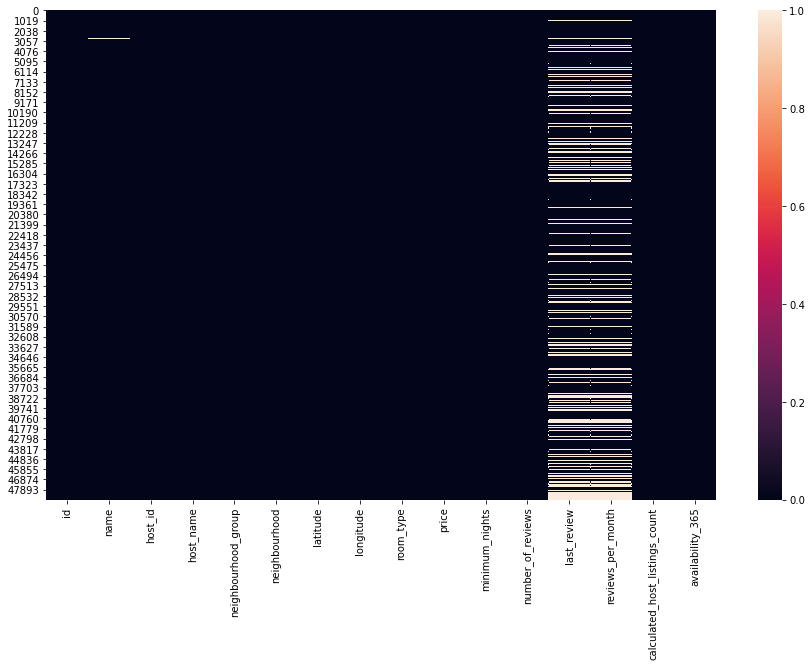

In [6]:
plt.figure(figsize=(15,9))
sns.heatmap(data=df.isnull())

In [7]:
df[df.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### ***Fill the null values with apropriet value***

In [8]:
df['last_review']=df['last_review'].fillna(value=0)  
df['reviews_per_month']=df['reviews_per_month'].fillna(value=0)                 
df['host_name']=df['host_name'].fillna(value='no name')
df['name']=df['name'].fillna(value='no name')

In [9]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(48895, 16)

### here we see 0 duplicate values

In [12]:
df['host_name'].nunique()

11453

In [13]:
df.neighbourhood.nunique()

221

In [14]:
df.neighbourhood.nunique()

221

In [15]:
df.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [16]:
df[df['host_name']==df['name']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,0.00,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0,0.00,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0,0.00,18,365


In [17]:
df[df['name']=='Clean & quiet apt home by the park']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [18]:
df[df['name']=='New york Multi-unit building']
#so on this viewpoint name also comes under categorical var!
#same property but hosted by different Airbnb hosts with different room_types & varied price ranges

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.10,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.10,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,0,0.00,2,365
34613,27457026,New york Multi-unit building,125320407,Sata,Queens,Jamaica,40.70653,-73.80561,Entire home/apt,1000,2,0,0,0.00,5,365
35177,27906346,New york Multi-unit building,27071572,Kinga,Manhattan,Upper West Side,40.79372,-73.97431,Entire home/apt,140,5,3,2019-04-24,0.29,1,89
35395,28078505,New york Multi-unit building,122849679,Maria,Brooklyn,Sheepshead Bay,40.59085,-73.95405,Private room,70,1,2,2018-11-03,0.20,1,0
35618,28284458,New york Multi-unit building,213604995,Doreen,Brooklyn,Bushwick,40.68705,-73.91456,Private room,75,2,85,2019-07-05,8.31,2,309
35810,28427324,New york Multi-unit building,214141672,Monica,Queens,Astoria,40.76466,-73.92731,Private room,120,1,1,2018-09-19,0.10,1,362
35918,28534405,New york Multi-unit building,2891643,Jacqueline,Manhattan,Harlem,40.82146,-73.94598,Private room,50,1,0,0,0.00,1,0
36180,28761735,New york Multi-unit building,65827591,Nubia,Queens,Maspeth,40.73616,-73.89926,Shared room,55,1,0,0,0.00,3,47


In [19]:
df.loc[(df['neighbourhood_group']=='Brooklyn') & (df['host_name']=='Sarah')].head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
142,32331,"Sunny, Cobble Hill Apartment",139874,Sarah,Brooklyn,Cobble Hill,40.68570,-73.99183,Entire home/apt,140,2,4,2016-04-24,0.04,1,0
158,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,Brooklyn,Boerum Hill,40.68559,-73.98094,Entire home/apt,475,3,23,2018-12-31,0.27,1,230
500,177421,Brand New Beautiful Duplex Apartment with Garden,848748,Sarah,Brooklyn,Greenpoint,40.72315,-73.95226,Entire home/apt,500,2,20,2019-06-24,0.21,2,127
1091,458377,Bright Spacious 2 Bedroom/5 Room - wRoof Deck,346366,Sarah,Brooklyn,Williamsburg,40.70147,-73.94378,Entire home/apt,229,3,12,2019-05-28,0.15,1,319
1095,461050,Perfect Bedford L Williamsburg Location!,2286224,Sarah,Brooklyn,Williamsburg,40.71613,-73.95837,Entire home/apt,200,3,17,2016-05-12,0.20,1,67
1390,618836,1 BR Apartment near Prospect Park!,3065891,Sarah,Brooklyn,Crown Heights,40.66959,-73.95718,Entire home/apt,115,3,0,0,0.00,1,0
1775,799319,Peaceful Garden Sanctuary best part of Brooklyn!,838848,Sarah,Brooklyn,Fort Greene,40.69075,-73.97192,Entire home/apt,128,5,154,2019-05-13,1.93,1,301
2053,919990,2 Bedroom Apt in Caroll Gardens,4629954,Sarah,Brooklyn,Carroll Gardens,40.67573,-73.99878,Entire home/apt,157,6,1,2017-01-03,0.03,1,24
2504,1283453,Adorable Williamsburg room!,4365496,Sarah,Brooklyn,Williamsburg,40.70794,-73.96077,Private room,112,2,9,2018-01-02,0.37,2,0
2954,1712462,Cozy Private Room in Brooklyn NY,9031941,Sarah,Brooklyn,Greenpoint,40.72124,-73.93673,Private room,110,4,2,2017-09-04,0.06,1,0


***Same hosts have hosted for different properties in same neighbourhood groups!***


So, far I was trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside)

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

We'll not bother much as these are not that important in our analysis and proceed further!

In [20]:
df.groupby('name')['host_name'].count().sort_values(ascending=False).head(10)

name
Hillside Hotel                                18
Home away from home                           17
no name                                       16
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Name: host_name, dtype: int64

In [21]:
df['name'].nunique()

47906

### 47906 has listing properties in airbnb 

In [22]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1)***Let's do analysis step by step***

***Checking the relation between numerical variable !***

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

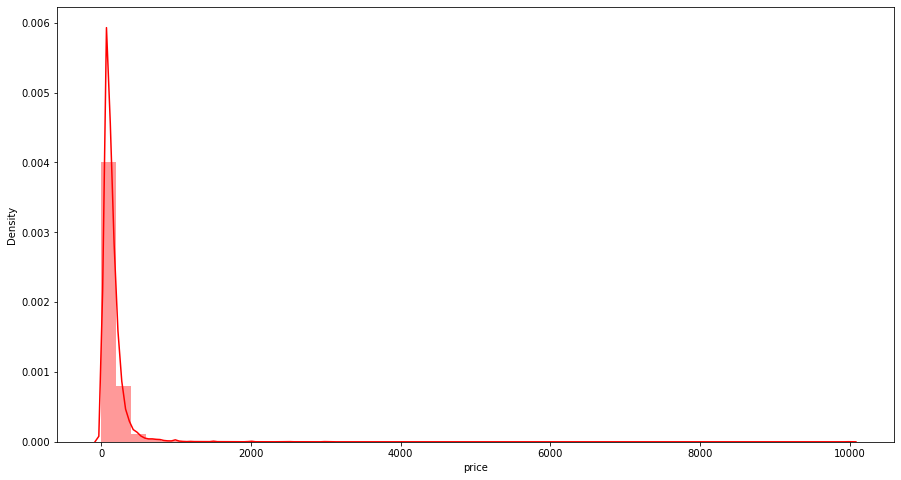

In [23]:
plt.figure(figsize=(15,8))

sns.distplot(df['price'],hist=True,color='r')


#### The distribution tells it has positive skew
#### also the distribution doesn't deviate much from normal distribution.

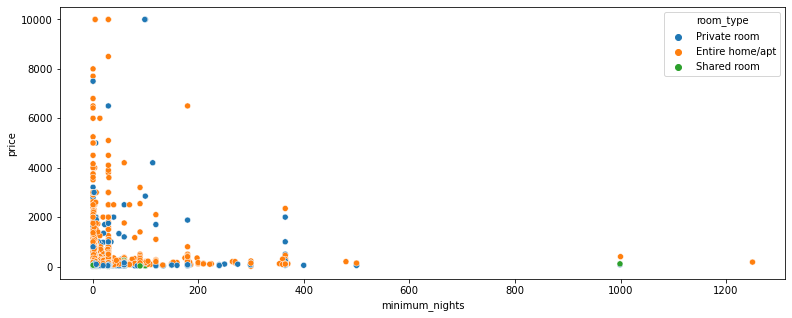

In [24]:
plt.figure(figsize=(13,5))
sns.scatterplot(x='minimum_nights',y='price',data=df,color='black',hue='room_type')
plt.savefig('price vs min nights.jpg')

**looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price. there are many outliers as well.**

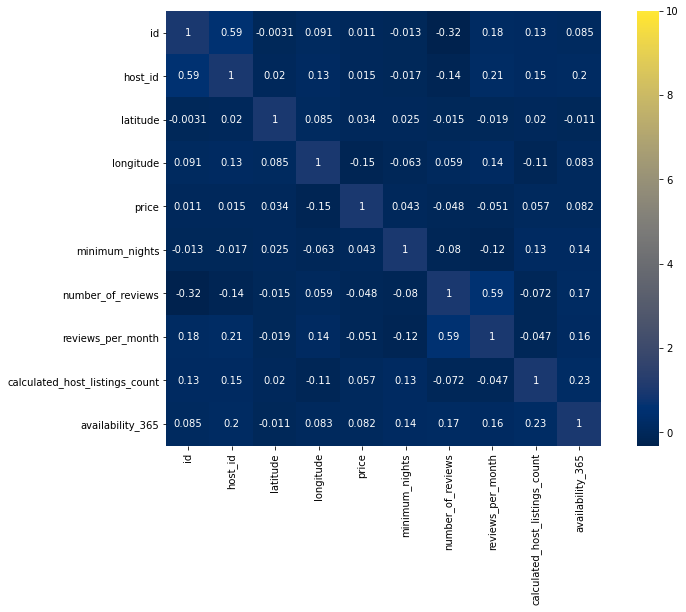

In [25]:
cor=df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(cor,vmax=10,square=True,annot=True,cmap='cividis')
plt.savefig('heatmap')

**Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.**

**Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.**

**no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!**

In [26]:
tophost=df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
tophost.sort_values(by='calculated_host_listings_count',ascending=False).head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103
7480,Kazuya,Queens,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96
2901,Corporate Housing,Manhattan,91


#### we will see the most listing host by **manhattan** Sonder(NYC) ,Blueground 

### ***Top host names***

In [27]:
s=df['host_name'].value_counts().head(10).reset_index()
host=pd.DataFrame(s)
host.rename(columns={'index':'host_name','host_name':'hostcount'})

,host_name,hostcount
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


<AxesSubplot:>

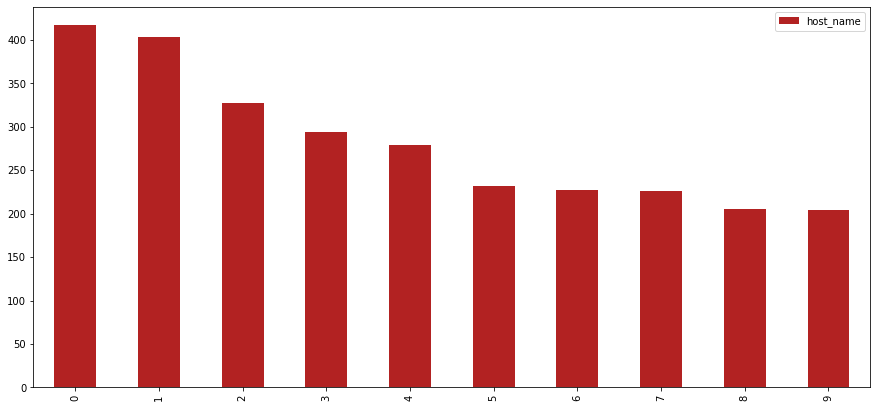

In [28]:
f,ax=plt.subplots(figsize=(15,7))
host.plot(kind='bar',color='firebrick',ax=ax)

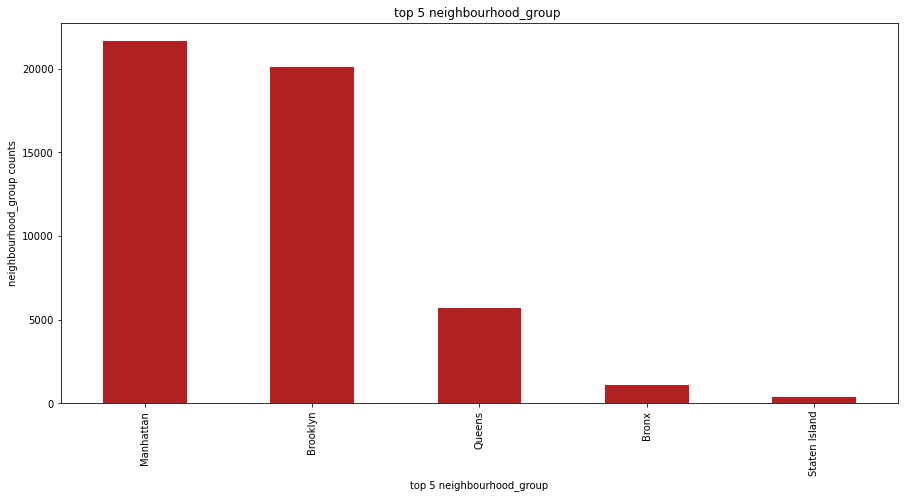

In [29]:
f,ax=plt.subplots(figsize=(15,7))
df['neighbourhood_group'].value_counts().plot(kind='bar',color='firebrick',ax=ax)
plt.xlabel('top 5 neighbourhood_group')
plt.ylabel('neighbourhood_group counts')
plt.title('top 5 neighbourhood_group ')
plt.savefig('neg.jpg')

In [30]:
a=df['neighbourhood_group'].value_counts().rename_axis('groups').reset_index(name='counts')
a

,groups,counts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


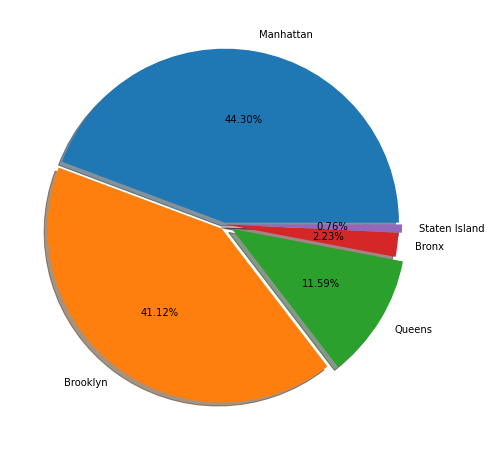

<Figure size 432x288 with 0 Axes>

In [31]:
val=a.counts
label=a.groups

fig=plt.figure(figsize=(15,8))
ax.axis('equal')
plt.pie(val,labels=label,autopct='%1.2f%%',explode=[0.01,0.03,0.05,0,0.02],shadow=0.5)
plt.show()
plt.savefig('groups.jpg',dpi=1200)

###  The host who genetate most revenue

In [32]:
revenue=df.groupby('host_name')['price'].sum().reset_index().sort_values(by='price',ascending=False).head(10)

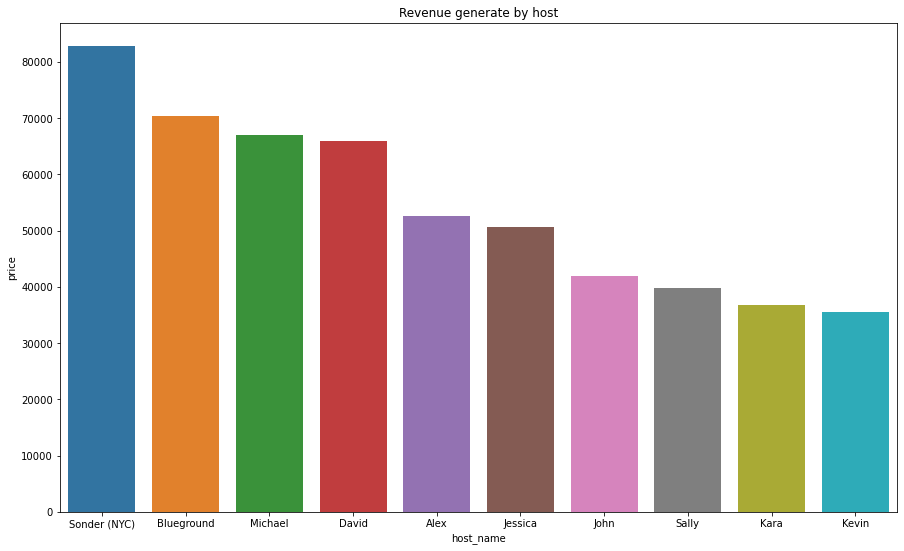

In [33]:
plt.figure(figsize=(15,9))
sns.barplot(x='host_name',y='price',data=revenue)
plt.title('Revenue generate by host')
plt.savefig('host.jpg')

#### we see the above graph ***Sonder(NYC)*** ganerate a most revenue comapare to other

### Lets see the host who got most reviews

In [34]:
reviews=df.groupby('host_name')['number_of_reviews'].sum().reset_index().sort_values(by='number_of_reviews',ascending=False)
reviews.head(10)

,host_name,number_of_reviews
7135,Michael,11081
2376,David,8103
4989,John,7223
4634,Jason,6522
314,Alex,6204
1931,Chris,5028
711,Anna,4799
3057,Eric,4733
2277,Daniel,4723
9213,Sarah,4579


In [35]:
top10_reviewed_listings= df.nlargest(10,'reviews_per_month')
top10_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
29628,22750161,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,2019-07-06,16.81,3,26
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
36238,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28
40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Lakshmee,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145


***Let's check the most no of listings in NYC first!***

In [36]:
Listing_counts=df['name'].value_counts()[:10].reset_index()
Listing_counts.rename(columns={'index':'listing on Aitbnb','name':'Total listing'})

,listing on Aitbnb,Total listing
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,no name,16
4,Brooklyn Apartment,12
5,Loft Suite @ The Box House Hotel,11
6,Private Room,11
7,Private room,10
8,Artsy Private BR in Fort Greene Cumberland,10
9,Cozy Brooklyn Apartment,8


***Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.***

In [37]:
n=df.groupby('room_type')['neighbourhood_group'].value_counts()
n=pd.DataFrame(n)
n=n.rename(columns={'neighbourhood_group':'counts'})

In [38]:
n

counts
room_type       neighbourhood_group        
Entire home/apt Manhattan             13199
                Brooklyn               9559
                Queens                 2096
                Bronx                   379
                Staten Island           176
Private room    Brooklyn              10132
                Manhattan              7982
                Queens                 3372
                Bronx                   652
                Staten Island           188
Shared room     Manhattan               480
                Brooklyn                413
                Queens                  198
                Bronx                    60
                Staten Island             9

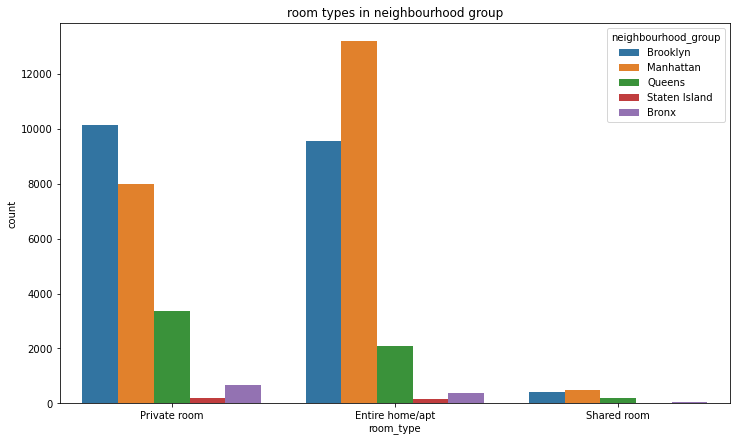

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='room_type',data=df,hue='neighbourhood_group')
plt.title('room types in neighbourhood group')
plt.show()
plt.savefig('rh.jpg')

##### Manhattan has more number of entire room,brookklyn hold the top share of private room,staten island has equal number of entire home and private room ,also see that staten island has small number of room type as compare to another neighbourhood .Which matches our neighbourhood group to listing counts 


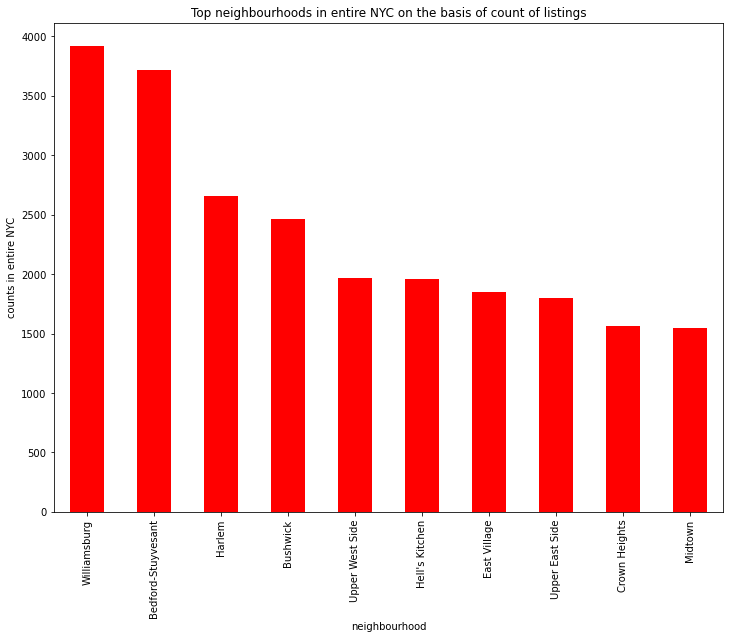

In [40]:
plt.figure(figsize=(12,9))
v=df['neighbourhood'].value_counts()[:10]
v.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')
plt.savefig('neighbourhood.jpg')

#### Let's look at the distribution of the listings with availability!

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

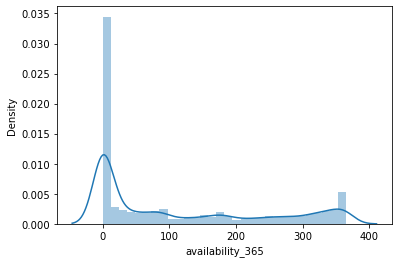

In [41]:
sns.distplot(df['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

### Handling the outliers

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

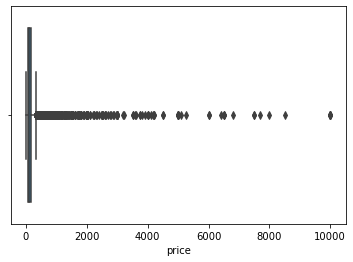

In [42]:
sns.boxplot(df['price'])

In [43]:
min_threshold,max_threshold= df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [44]:
df[df.price<min_threshold] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,0.00,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,0.00,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,0.00,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,0.00,6,338


In [45]:
df[df.price>max_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,0.00,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,0.00,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,0.00,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,0.00,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,0.00,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365


### removing the outliers

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.540000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [47]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    return lower_range,upper_range

In [48]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [49]:
lower_bound

-90.0

In [50]:
df[(df.price<lower_bound) | (df.price>upper_bound)]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,0.00,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,0.00,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,0.00,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,0.00,1,9


In [51]:
dfd1=df[(df.price>lower_bound) & (df.price<upper_bound)]
dfd1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


<AxesSubplot:>

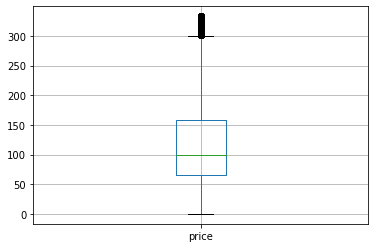

In [52]:
dfd1.boxplot(column='price')

### Bi-variate Analysis!

In [53]:
dfd1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

### Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

We can do a seaborn point plot to get the average prices/neighbourhood in NYC!

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

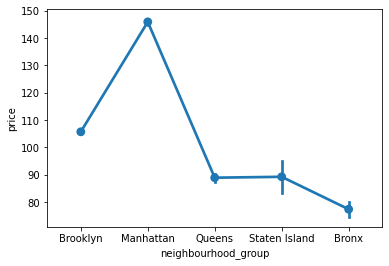

In [54]:
sns.pointplot(x='neighbourhood_group',y='price',data=dfd1)

 We can see that ***Manhattan*** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn**

 **Queens** and **Staten Island** have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

 Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

## Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!

In [55]:
dfd1.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Cullen,Entire home/apt,333
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Adam,Entire home/apt,333
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Fatima,Private room,333
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Mel,Entire home/apt,333
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Rated,Entire home/apt,333


**Looks like the all the top 5 costliest listings belongs to Manhattan itself(being the most costliest place of living in NYC)**

In [56]:
dfd1.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,Sergii,Shared room,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room,0
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room,0
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Aymeric,Entire home/apt,0


**Also, the cheapest listings mostly comes from Brooklyn, Queens and all are private rooms which makes sense.**

## Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

In [57]:
top_avg=dfd1.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().reset_index().sort_values(ascending=False,by='price').head(30)

In [58]:
top_neigh=top_avg.loc[top_avg.groupby('neighbourhood')['price'].idxmax()].sort_values(ascending=False,by='price')
top_neigh

,neighbourhood,neighbourhood_group,price
214,Willowbrook,Staten Island,249.000000
138,Neponsit,Queens,237.000000
21,Breezy Point,Queens,213.333333
196,Tribeca,Manhattan,212.495327
143,NoHo,Manhattan,205.290909
208,West Village,Manhattan,192.901235
75,Flatiron District,Manhattan,188.090909
73,Financial District,Manhattan,183.973926
126,Midtown,Manhattan,180.948381
91,Greenwich Village,Manhattan,179.853372


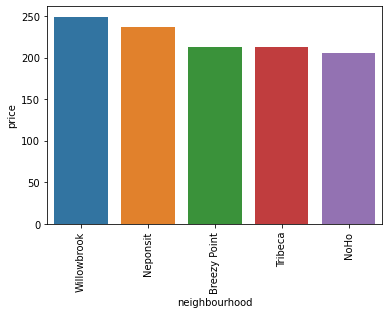

<Figure size 432x288 with 0 Axes>

In [59]:
sns.barplot(x='neighbourhood',y='price',data=top_neigh.head(),)
plt.xticks(rotation=90)
plt.show()
plt.savefig('neigh.jpg')

**Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: Fort Wadsworth & Sea Gate, origins from Staten Island & Brooklyn.**

**from Bronx and Tribeca from Manhattan. Neponsit from Queens.**

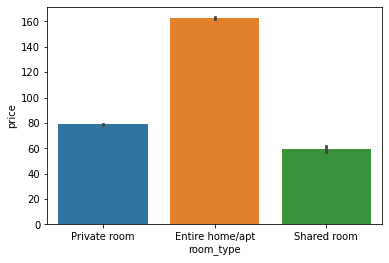

In [60]:
sns.barplot(x='room_type',y='price',data=dfd1)
plt.savefig('roomType.jpg')

In [61]:
room_type=dfd1['room_type'].value_counts().rename_axis('room_types').reset_index(name='counts')
room_type

,room_types,counts
0,Entire home/apt,22784
1,Private room,21996
2,Shared room,1138


In [62]:
labels=room_type.room_types
cnt=room_type.counts

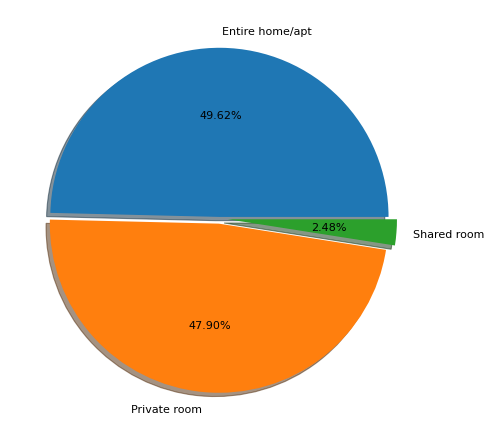

<Figure size 432x288 with 0 Axes>

In [63]:
fig=plt.figure(figsize=(10,7),dpi=80)
ax.axis('equal')
plt.pie(cnt,labels=labels,autopct='%1.2f%%',explode=[0.01,0.03,0.05],shadow=1.5)
plt.show()
plt.savefig('roomtype21.jpg')

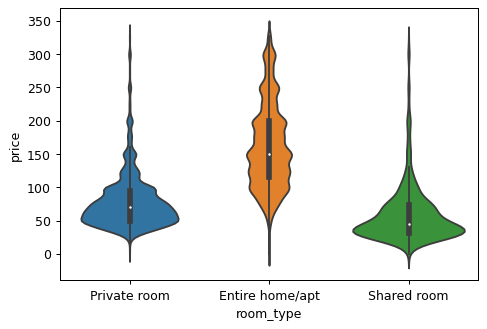

In [64]:
plt.figure(dpi=90)
sns.violinplot(x='room_type',y='price',data=dfd1)
plt.savefig('rmtype.jpg')

***The entire home/ apt are the highest room in NYC followed by private rooms. shared room has less number of room in NYC***

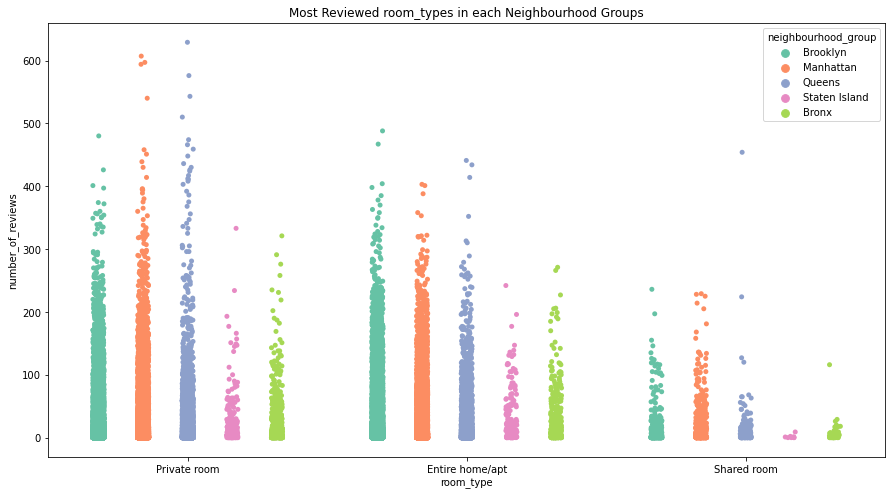

In [65]:
plt.figure(figsize=(15,8))
sns.stripplot(x='room_type',y='number_of_reviews',hue='neighbourhood_group',data=dfd1,dodge=True,palette='Set2')
plt.title('Most Reviewed room_types in each Neighbourhood Groups')
plt.show()

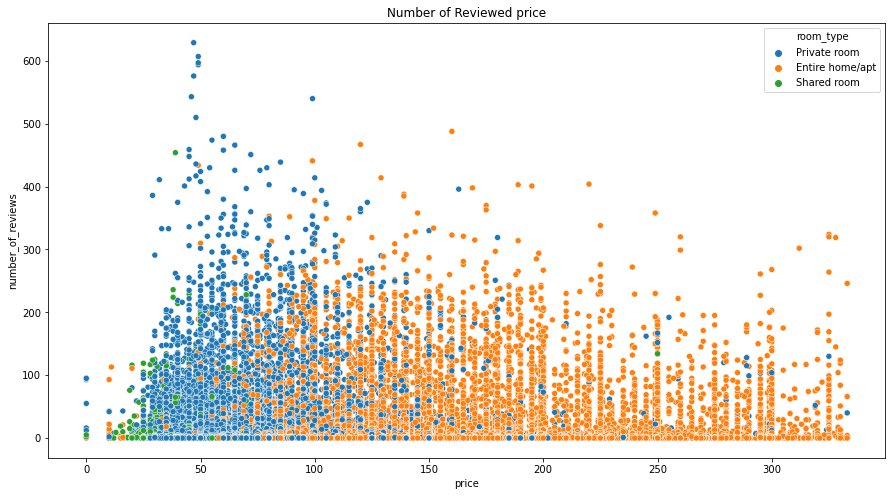

In [66]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='price',y='number_of_reviews',hue='room_type',data=dfd1)
plt.title('Number of Reviewed price')
plt.savefig('reviews vs price')
plt.show()

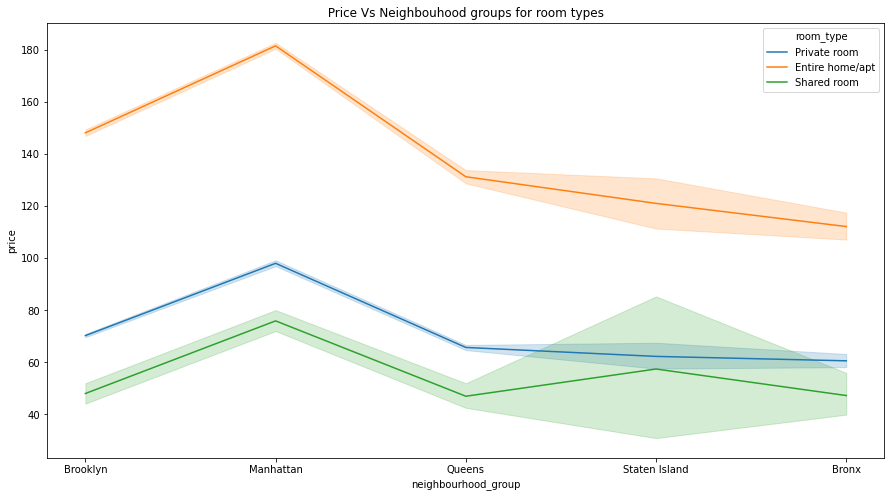

In [67]:
plt.figure(figsize=(15,8))
sns.lineplot(x='neighbourhood_group', y='price',hue='room_type', data=dfd1) 
plt.title(" Price Vs Neighbouhood groups for room types ")
plt.savefig('neighbourhood vs price')
plt.show()

### Room_types and their relation with availability in different neighbourhood groups!

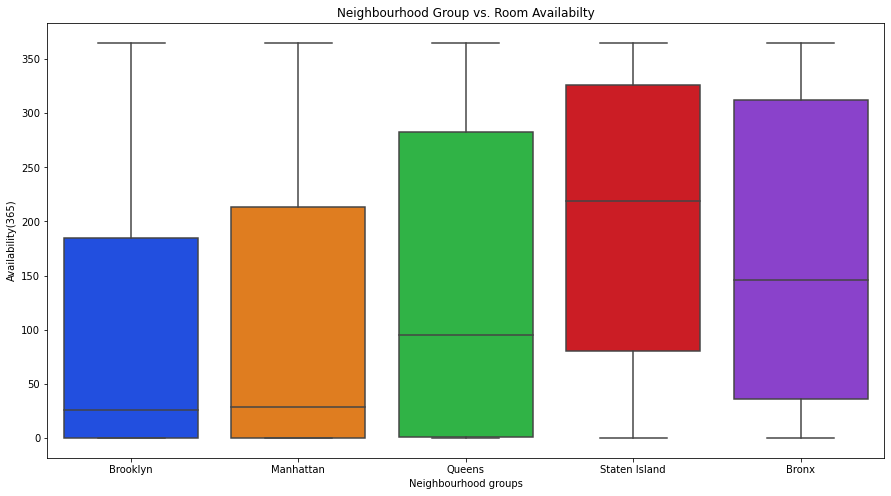

<Figure size 432x288 with 0 Axes>

In [68]:
f,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='neighbourhood_group',y='availability_365',data=dfd1,palette="bright",ax=ax)
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()
plt.savefig('roomavailability.jpg')

**Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.**

### Most Costlier Place in NYC 

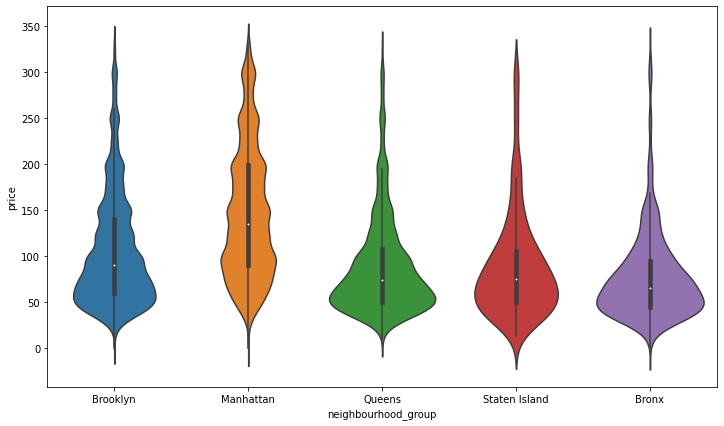

In [69]:
plt.figure(figsize=(12,7))
sns.violinplot(x='neighbourhood_group',y='price',data=dfd1,)
plt.savefig('costier place.jpg')

#### As usual Manhattan being costlier place to leave in NYC more than 140 USD  average price followed by Brooklyn with around 80 USD on an average for the listings
#### Queen and Staten island both are same price range 75 USD .
#### The highest price range could go above 360 USD

### Let's see what can be done with latitude and longitude!

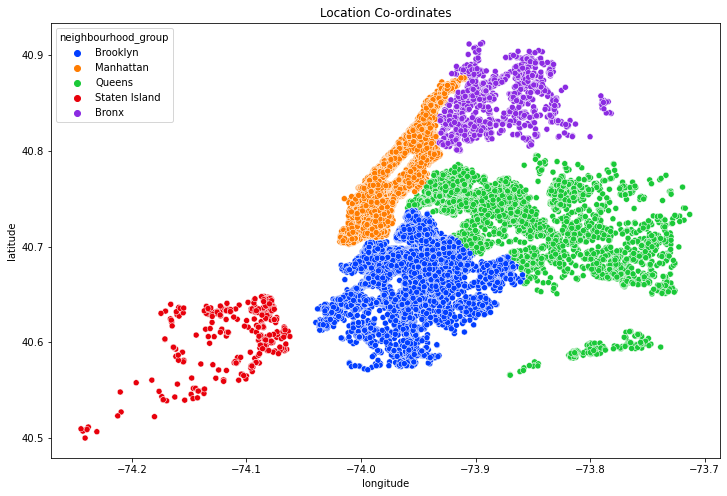

In [70]:
plt.figure(figsize=(12,8))
ax= sns.scatterplot(data=dfd1, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')
plt.savefig('neighbourhood vs location')
plt.show()

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

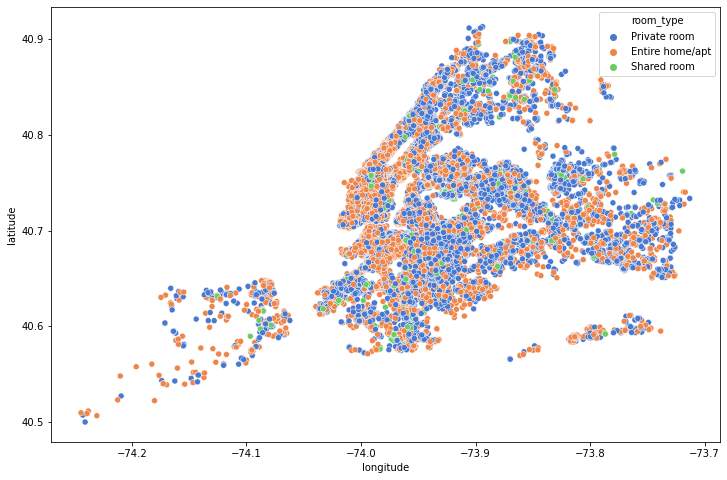

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dfd1.longitude, y=dfd1.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

***By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.*** 

***95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.***

***Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis***

### Conclusion

We have explored the Airbnb dataset and drawn a lot of information out of it. This Airbnb dataset contains data from five boroughs of New York City namely Mahattan, Brooklyn, Queens, Bronx and Staten Island. Some of the conclusions that are listed below:


 **1. Manhattan has the maximum number of Airbnb listing and is the costliest among all the five boroughs, some of the factors contributing to it are as follows:**
 
    Manhattan's geographical location: Manhattan is located as such that most of the districts are not at much distance to it.
    
    Almost 99% of the attractions are in Manhattan namely Empire State Building, the Rockefeller Center, the surprising Chrysler 
    
    Building, the fascinating Times Square, the controversial MoMA, and other top attractions.
    Manhattan is home to the world's two largest stock exchanges by total market capitalization: the New York Stock Exchange and Nasdaq and the borough hosts the United Nations headquarters
    
    The borough has been the setting for numerous books, films, and television shows.

**2) The top host that has maximum number of listing is Sonder (NYC) who is from Manhattan.**

**3) The room types of Airbnb listings have three categories - Private Room, Entire Home/apt and Shared Room. Follwing are the observations that we got from our data exploration:**

    Entire Home/Apt are costliest and maximum in number, and it is generally booked for long duration and maximum number of this room type is available in Manhattan.
    People prefer Private room for short duration and it is less costly than Entire home/apt and Shared room types are the cheapest and very less preferred.
    Private rooms have greater number of reviews than other two room types as it cost less than Entire home/apt and the listings offering private rooms has lesser minimum nights dependency which gives guests the flexibility to check out.

**3) The boroughs that has less number of listings namely Queens, Staten Island and Bronx, are receiving more number of reviews. Manhattan and Brooklyn has lesser number of reviews comparitively. This may be due to following reasons:**

     The number of listings in Queens, Staten island and Bronx are less and the hosts are able to cater to most of their guests.
     There may be more corporate bookings in Manhattan or the high profile people are visiting Manhattan, and they probably do not give reviews most often.